# Linear Regression Model Training
### Read in features and labels
### Do some multivariate linear regression
### See how good the fits are

In [40]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr

%matplotlib inline

In [41]:
# read in features and labels/examples (see build_features_labels2.ipynb for more info)
features = pd.read_csv('data_final/features.csv')
print features.shape
print features.columns
features[:10]

(314, 47)
Index([u'census_tract', u'bus_age', u'n_business', u'n_businesses_11',
       u'n_businesses_21', u'n_businesses_22', u'n_businesses_23',
       u'n_businesses_31', u'n_businesses_32', u'n_businesses_33',
       u'n_businesses_42', u'n_businesses_44', u'n_businesses_45',
       u'n_businesses_48', u'n_businesses_49', u'n_businesses_51',
       u'n_businesses_52', u'n_businesses_53', u'n_businesses_54',
       u'n_businesses_55', u'n_businesses_56', u'n_businesses_61',
       u'n_businesses_62', u'n_businesses_71', u'n_businesses_72',
       u'n_businesses_81', u'n_businesses_92', u'population',
       u'population_percent_male', u'population_percent_female', u'age_med',
       u'age_med_male', u'age_med_female', u'minor_percent', u'adult_percent',
       u'homes', u'homes_percent_mortgage', u'homes_percent_clear',
       u'homes_percent_rent', u'employment_percent', u'income_med',
       u'income_med_owner', u'income_med_renter', u'cost_med',
       u'cost_med_owner', u'cost_

,census_tract,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,...,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,total_amount
0,100,0.541876,0.040244,0.25,0.0,0.0,0.027027,0.000000,0.000,0.006757,...,0.231,0.180,0.372928,0.615612,0.499898,0.147354,0.513829,0.48075,0.9195,0.000000
1,201,0.538251,0.055183,0.00,0.0,0.0,0.032432,0.000000,0.000,0.006757,...,0.111,0.548,0.574586,0.566840,0.684250,0.227237,0.362798,0.56075,0.4870,0.021766
2,202,0.541876,0.055793,0.25,0.0,0.0,0.054054,0.000000,0.000,0.000000,...,0.095,0.578,0.654696,0.434022,0.417067,0.318495,0.422722,0.50650,0.7225,0.059047
3,300,0.486091,0.150000,0.25,0.0,0.0,0.037838,0.058824,0.025,0.027027,...,0.066,0.719,0.602210,0.356844,0.491126,0.270861,0.377983,0.57750,0.6410,0.357875
4,400,0.516499,0.146037,0.00,0.0,0.0,0.021622,0.029412,0.000,0.006757,...,0.034,0.844,0.660221,0.396237,0.347169,0.358638,0.352223,0.46750,0.6275,0.234442
5,500,0.449023,0.061280,0.00,0.0,0.0,0.027027,0.058824,0.000,0.000000,...,0.081,0.652,0.720994,0.317670,0.366111,0.265293,0.331887,0.45475,0.5725,0.011336
6,600,0.387541,0.076220,0.00,0.0,0.0,0.027027,0.029412,0.000,0.000000,...,0.066,0.701,0.689227,0.323496,0.349367,0.281653,0.329718,0.39675,0.5905,0.006188
7,700,0.446434,0.064939,0.25,0.0,0.0,0.032432,0.058824,0.025,0.006757,...,0.052,0.747,0.653315,0.399066,0.505572,0.327974,0.365239,0.60425,0.6205,0.062528
8,800,0.360758,0.040549,0.00,0.0,0.0,0.016216,0.000000,0.000,0.006757,...,0.055,0.712,0.613260,0.261325,0.401084,0.215931,0.296367,0.45200,0.5055,0.007590
9,900,0.264131,0.071341,0.00,0.0,0.0,0.016216,0.088235,0.050,0.006757,...,0.015,0.851,0.715470,0.266590,0.271528,0.229727,0.286334,0.45100,0.4975,0.016920


## Look for correlated features

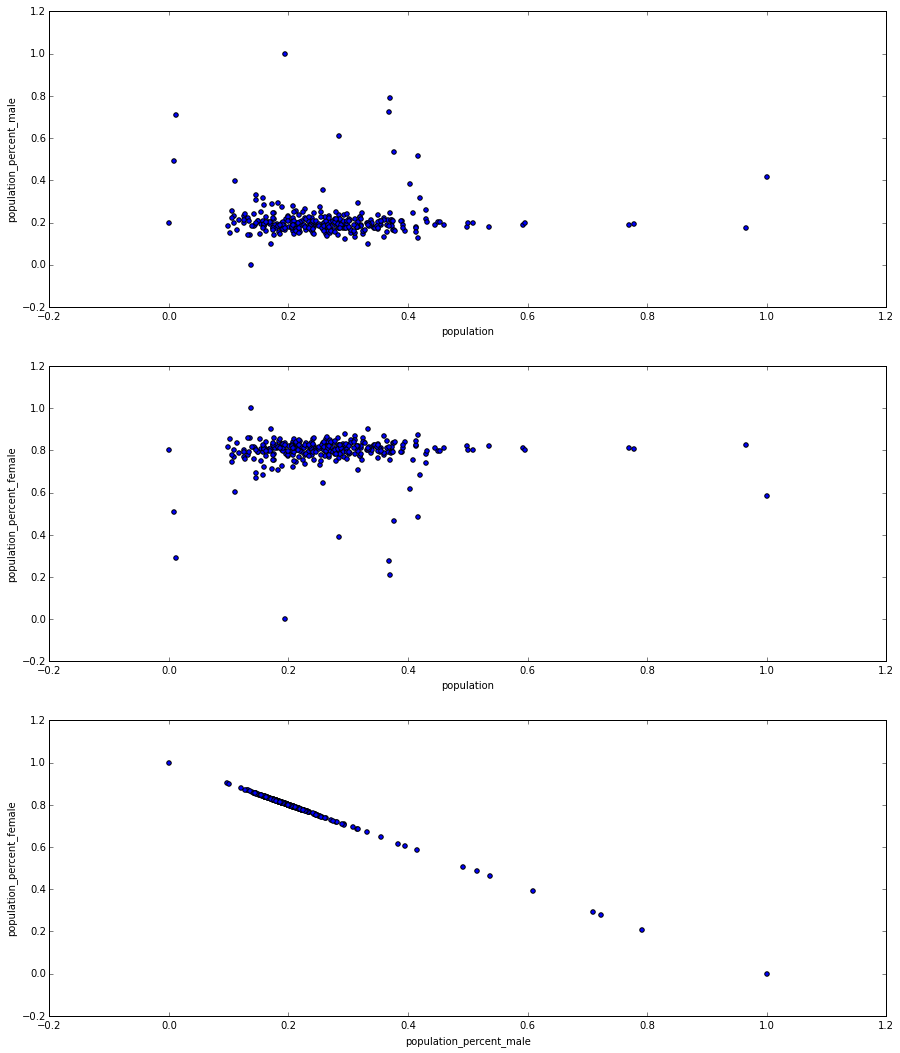

In [42]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='population_percent_male', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='population', y='population_percent_female', ax=axs[1])
features.plot(kind='scatter', x='population_percent_male', y='population_percent_female', ax=axs[2])

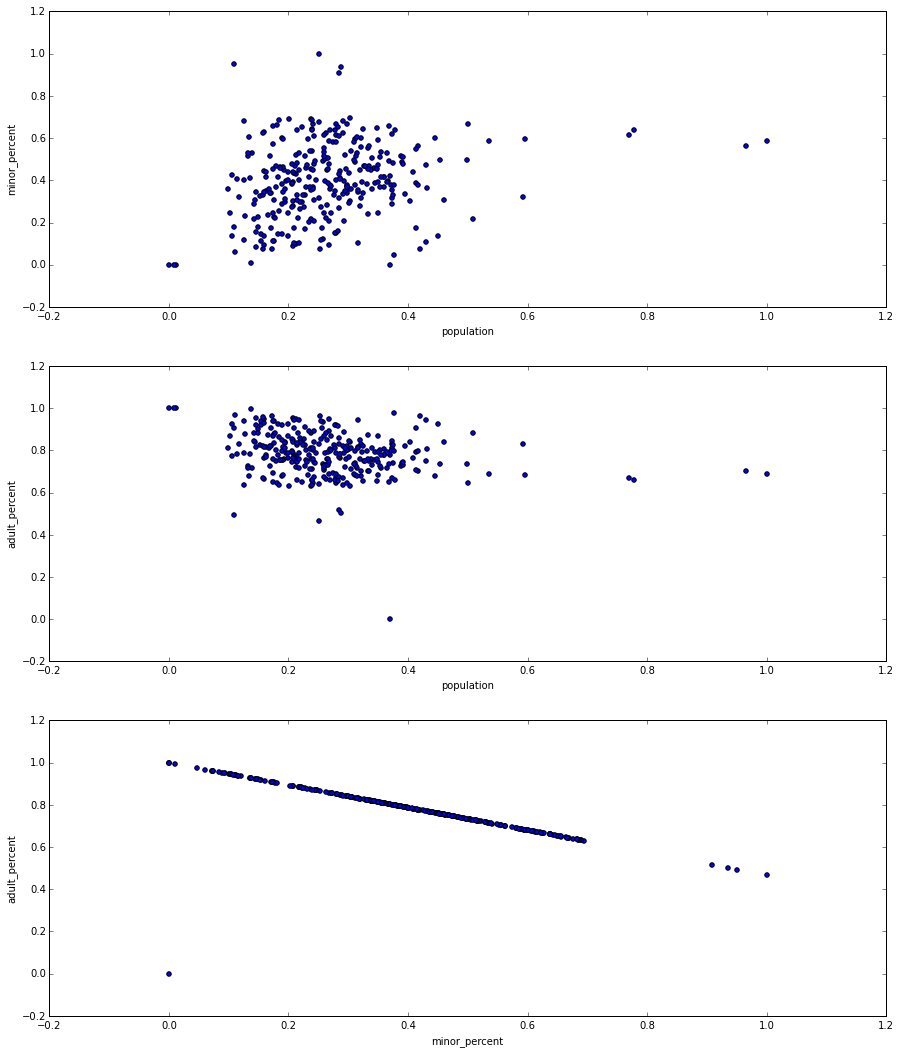

In [43]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='minor_percent', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='population', y='adult_percent', ax=axs[1])
features.plot(kind='scatter', x='minor_percent', y='adult_percent', ax=axs[2])

(0.98740634343047118, 6.5522747087192956e-252)
(0.98616964813675545, 1.3214691619984144e-245)
(0.94910183855863772, 1.3701352243360731e-158)


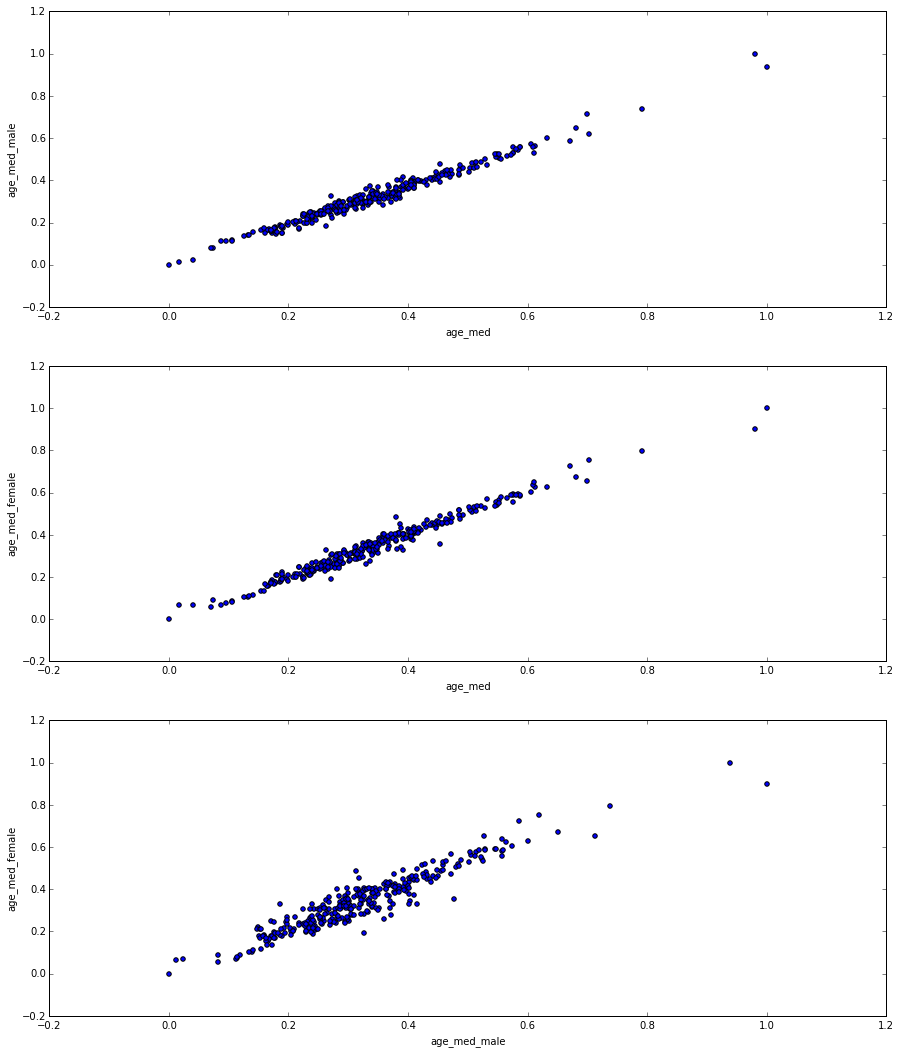

In [44]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='age_med', y='age_med_male', ax=axs[0], figsize=(15, 18))
# first value is the r-value, second is the p-value
print pearsonr(features.age_med,features.age_med_male)
features.plot(kind='scatter', x='age_med', y='age_med_female', ax=axs[1])
print pearsonr(features.age_med,features.age_med_female)
features.plot(kind='scatter', x='age_med_male', y='age_med_female', ax=axs[2])
print pearsonr(features.age_med_female,features.age_med_male)

(0.30601361801052224, 3.1251712186450032e-08)
(-0.90996791259916032, 2.6378546907706509e-121)
(-0.61178165589999245, 1.2626081680277716e-33)


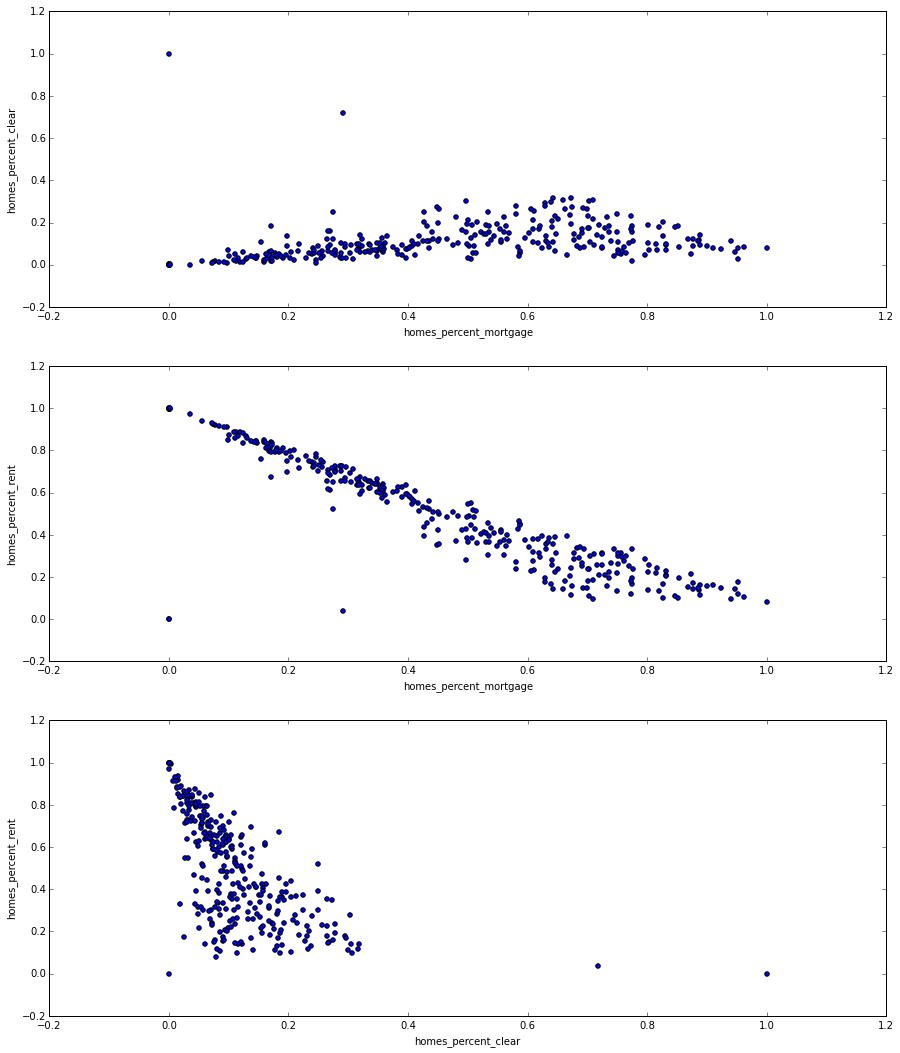

In [45]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='homes_percent_mortgage', y='homes_percent_clear', ax=axs[0], figsize=(15, 18))
print pearsonr(features.homes_percent_mortgage,features.homes_percent_clear)
features.plot(kind='scatter', x='homes_percent_mortgage', y='homes_percent_rent', ax=axs[1])
print pearsonr(features.homes_percent_mortgage,features.homes_percent_rent)
features.plot(kind='scatter', x='homes_percent_clear', y='homes_percent_rent', ax=axs[2])
print pearsonr(features.homes_percent_clear,features.homes_percent_rent)

(0.78328491781081733, 2.2328952171697822e-66)
(0.81895417385667846, 3.0745497331727006e-77)
(0.58995537201954507, 7.9222329379736642e-31)


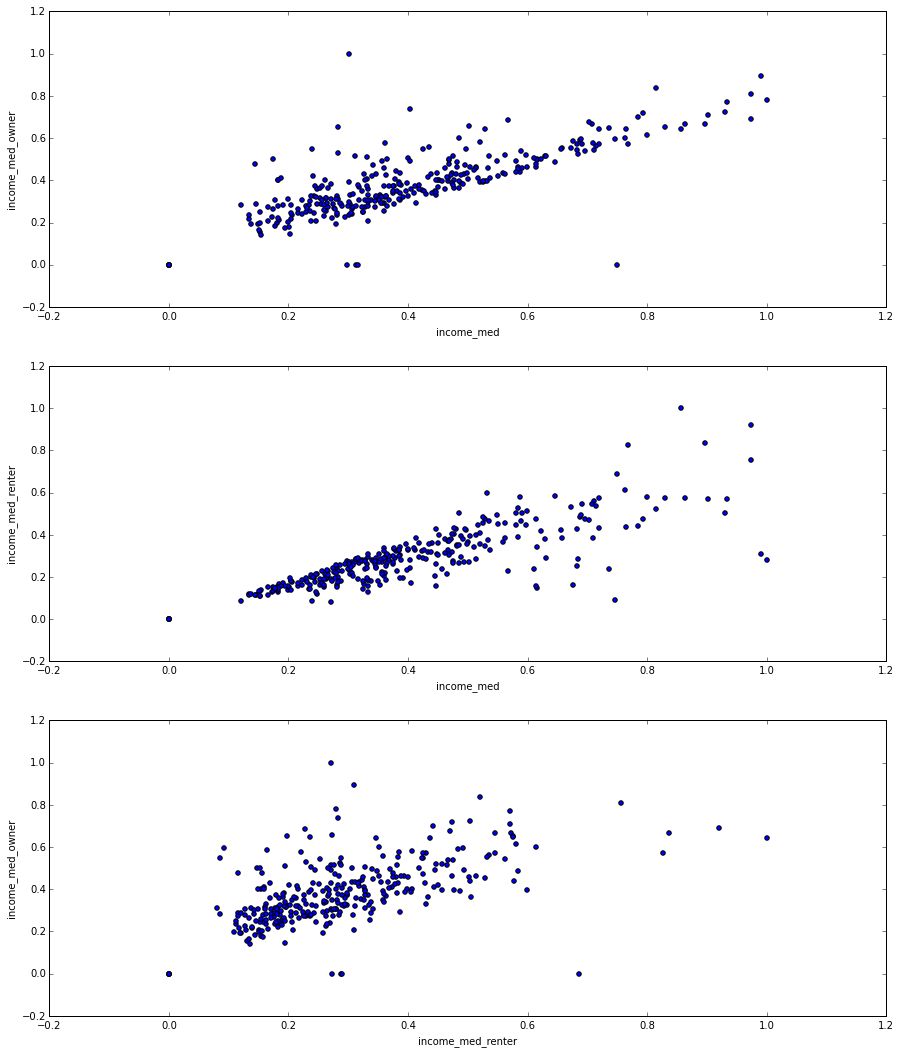

In [46]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='income_med', y='income_med_owner', ax=axs[0], figsize=(15, 18))
print pearsonr(features.income_med,features.income_med_owner)
features.plot(kind='scatter', x='income_med', y='income_med_renter', ax=axs[1])
print pearsonr(features.income_med,features.income_med_renter)
features.plot(kind='scatter', x='income_med_renter', y='income_med_owner', ax=axs[2])
print pearsonr(features.income_med_renter,features.income_med_owner)

(0.7276895135429986, 5.0820414069040754e-53)
(0.84659325766533022, 1.8704371662674589e-87)
(0.52984003196353002, 3.9994084262206345e-24)


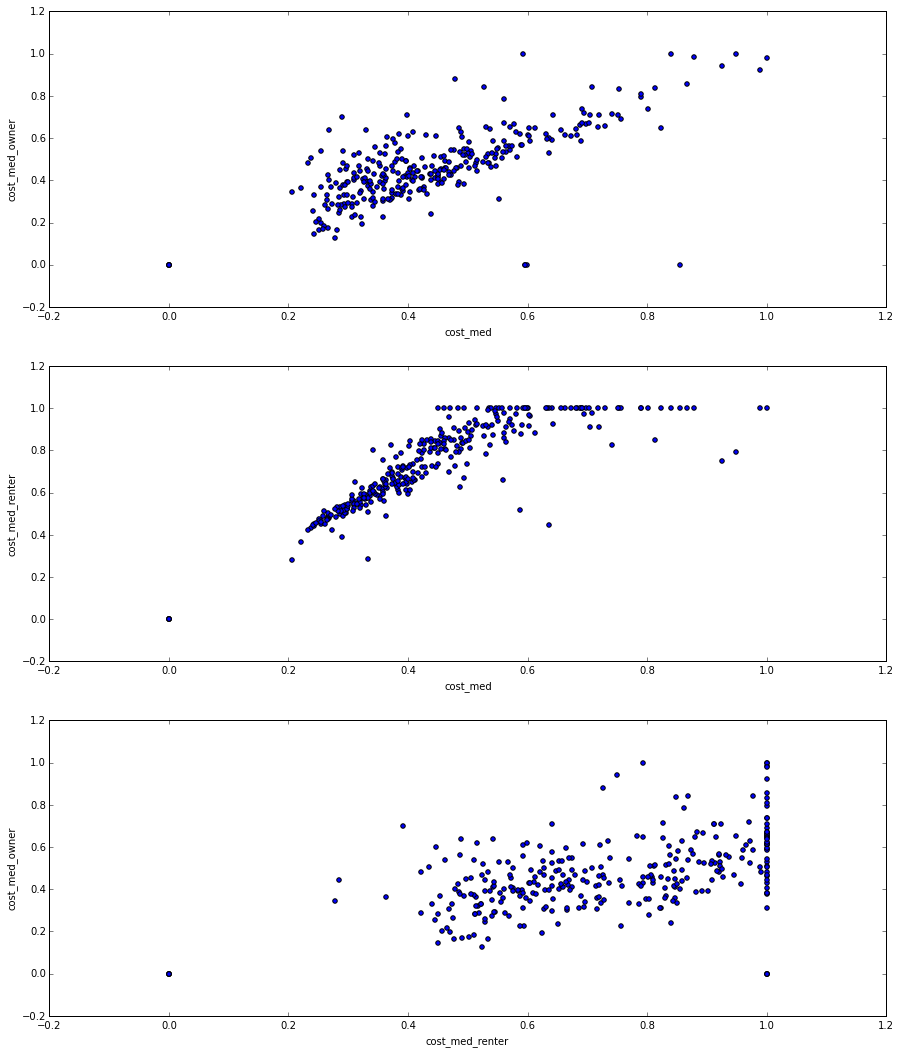

In [47]:
# plot features vs. each other
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='cost_med', y='cost_med_owner', ax=axs[0], figsize=(15, 18))
print pearsonr(features.cost_med,features.cost_med_owner)
features.plot(kind='scatter', x='cost_med', y='cost_med_renter', ax=axs[1])
print pearsonr(features.cost_med,features.cost_med_renter)
features.plot(kind='scatter', x='cost_med_renter', y='cost_med_owner', ax=axs[2])
print pearsonr(features.cost_med_renter,features.cost_med_owner)

## See if individual features are correlated w/ labels

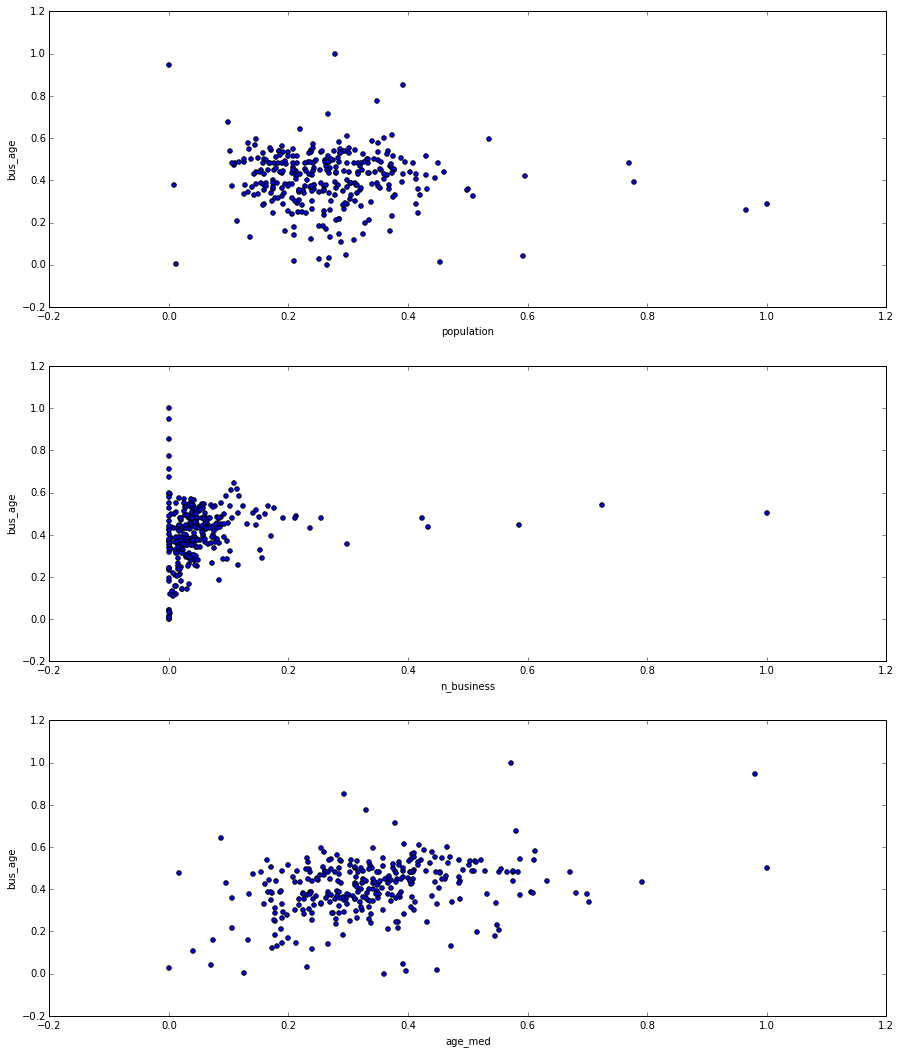

In [48]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='population', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='n_business', y='bus_age', ax=axs[1])
features.plot(kind='scatter', x='age_med', y='bus_age', ax=axs[2])

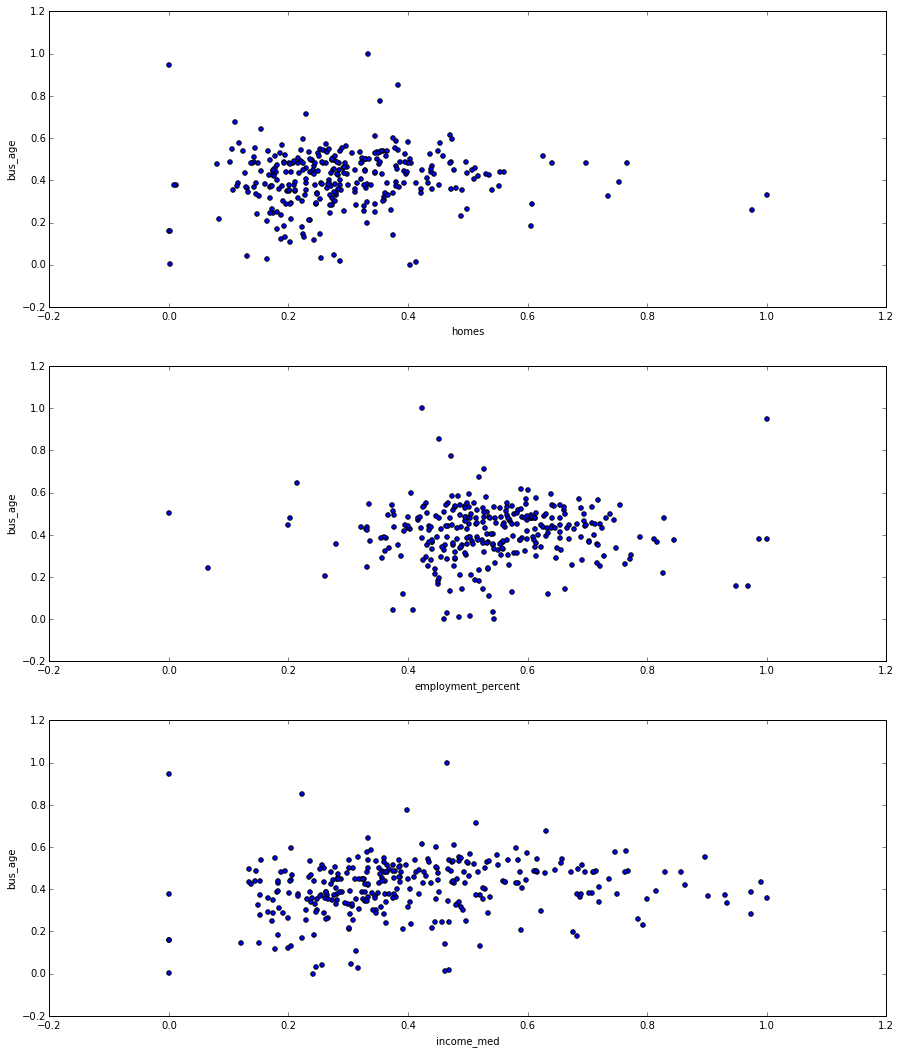

In [49]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
features.plot(kind='scatter', x='homes', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='employment_percent', y='bus_age', ax=axs[1])
features.plot(kind='scatter', x='income_med', y='bus_age', ax=axs[2])

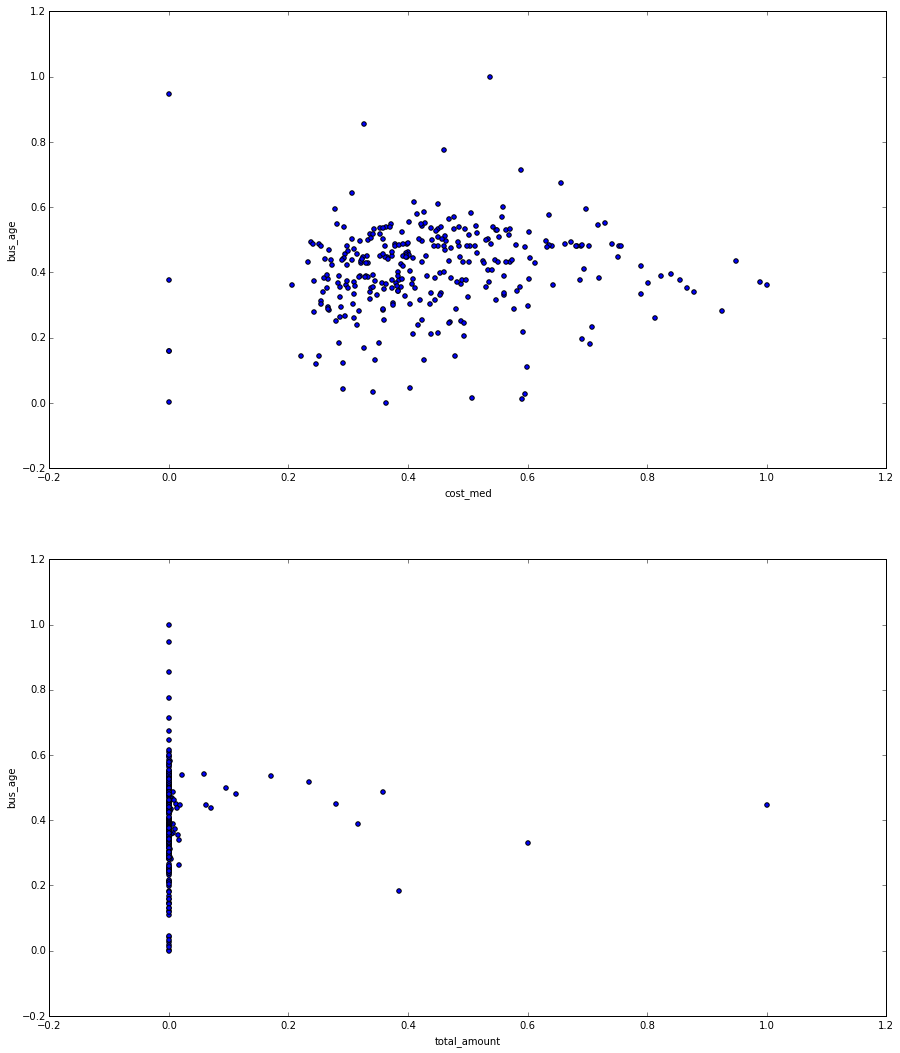

In [50]:
# plot features vs. score
fig, axs = plt.subplots(2,1, sharey=True)
features.plot(kind='scatter', x='cost_med', y='bus_age', ax=axs[0], figsize=(15, 18))
features.plot(kind='scatter', x='total_amount', y='bus_age', ax=axs[1])

## Fit w/ all input features (using statsmodels)

In [51]:
# fit the data
#   + to use feature
#   - to remove feature
#   : to multiply 2 features
#   * to multiply 2 features *and* use both individually
#   C(<feature>) to make <feature> into dummy/categorical feature
model = smf.ols(formula='bus_age ~ n_business + n_businesses_11 - n_businesses_21 - n_businesses_22 + n_businesses_23 +' \
             'n_businesses_31 + n_businesses_32 + n_businesses_33 + n_businesses_42 + n_businesses_44 +' \
             'n_businesses_45 + n_businesses_48 + n_businesses_49 + n_businesses_51 + n_businesses_52 +' \
             'n_businesses_53 + n_businesses_54 + n_businesses_55 + n_businesses_56 + n_businesses_61 +' \
             'n_businesses_62 + n_businesses_71 + n_businesses_72 + n_businesses_81 + n_businesses_92 +' \
             'population + population_percent_male + population_percent_female + age_med + age_med_male + '\
             'age_med_female + minor_percent + adult_percent + homes + homes_percent_mortgage + '\
             'homes_percent_clear + homes_percent_rent + employment_percent + income_med + income_med_owner + '\
             'income_med_renter + cost_med + cost_med_owner + cost_med_renter + total_amount', data=features).fit()
# print the coefficients
model.params

Intercept                   -7.703511e+10
n_business                  -3.173327e+01
n_businesses_11              1.641278e-02
n_businesses_23              2.067515e+00
n_businesses_31              1.377753e-01
n_businesses_32              1.695225e-01
n_businesses_33              1.436786e+00
n_businesses_42              2.400125e+00
n_businesses_44              2.852324e+00
n_businesses_45              4.804114e+00
n_businesses_48              1.911628e+00
n_businesses_49              6.406656e-01
n_businesses_51              3.575470e-01
n_businesses_52              5.730441e-01
n_businesses_53              1.535605e+00
n_businesses_54              9.187278e+00
n_businesses_55              2.635237e-01
n_businesses_56              1.447166e+00
n_businesses_61              5.460723e-01
n_businesses_62              2.576803e+00
n_businesses_71              7.150644e-01
n_businesses_72              1.785851e+00
n_businesses_81              5.538694e+00
n_businesses_92              3.537

In [52]:
# print a summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bus_age   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.416
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           1.23e-05
Time:                        12:49:04   Log-Likelihood:                 231.82
No. Observations:                 314   AIC:                            -377.6
Df Residuals:                     271   BIC:                            -216.4
Df Model:                          42                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -7.704e+10   2.95e+10     -2.610      0.010     -1.35e+11 -1.89e+10
n_business                  -31.7333     72.441     -0.438      0.662      -174.353   110.886
n_businesses_11               0.0164      0.105      0.156      0.876        -0.190     0.223
n_businesses_23               2.0675      4.148      0.498      0.619        -6.099    10.234
n_businesses_31               0.1378      0.754      0.183      0.855        -1.346     1.621
n_businesses_32               0.1695      1.066      0.159      0.874        -1.929     2.269
n_businesses_33               1.4368      3.318      0.433      0.665        -5.095     7.969
n_businesses_42               2.4001      5.774      0.416      0.678        -8.967    13.767
n_businesses_44               2.8523      6.322      0.451      0.652        -9.594    15.299
n_businesses_45               4.8041     11.038      0.435      0.664       -16.927    26.535
n_businesses_48               1.9116      4.078      0.469      0.640        -6.116     9.939
n_businesses_49               0.6407      1.595      0.402      0.688        -2.500     3.782
n_businesses_51               0.3575      1.321      0.271      0.787        -2.243     2.958
n_businesses_52               0.5730      1.885      0.304      0.761        -3.138     4.284
n_businesses_53               1.5356      3.751      0.409      0.683        -5.850     8.921
n_businesses_54               9.1873     19.035      0.483      0.630       -28.288    46.663
n_businesses_55               0.2635      0.419      0.629      0.530        -0.562     1.089
n_businesses_56               1.4472      3.192      0.453      0.651        -4.836     7.731
n_businesses_61               0.5461      1.529      0.357      0.721        -2.465     3.557
n_businesses_62               2.5768      5.521      0.467      0.641        -8.292    13.446
n_businesses_71               0.7151      1.667      0.429      0.668        -2.567     3.997
n_businesses_72               1.7859      5.414      0.330      0.742        -8.872    12.444
n_businesses_81               5.5387     11.296      0.490      0.624       -16.700    27.778
n_businesses_92               0.0354      0.060      0.590      0.556        -0.083     0.153
population                   -0.2411      0.160     -1.503      0.134        -0.557     0.075
population_percent_male    7.704e+10   2.95e+10      2.610      0.010      1.89e+10  1.35e+11
population_percent_female  7.704e+10   2.95e+10      2.610      0.010      1.89e+10  1.35e+11
age_med                       1.6803      2.109      0.797      0.426        -2.473     5.833
age_med_male                 -0.7134      1.229     -0.580      0.562        -3.134     1.707
age_med_female               -1.0030      1.027     -0.976      0.330        -3.026     1.020
minor_percent                -5.7583      8.798     -0.654  

0.406566919325
0.407529830933
0.070765118648


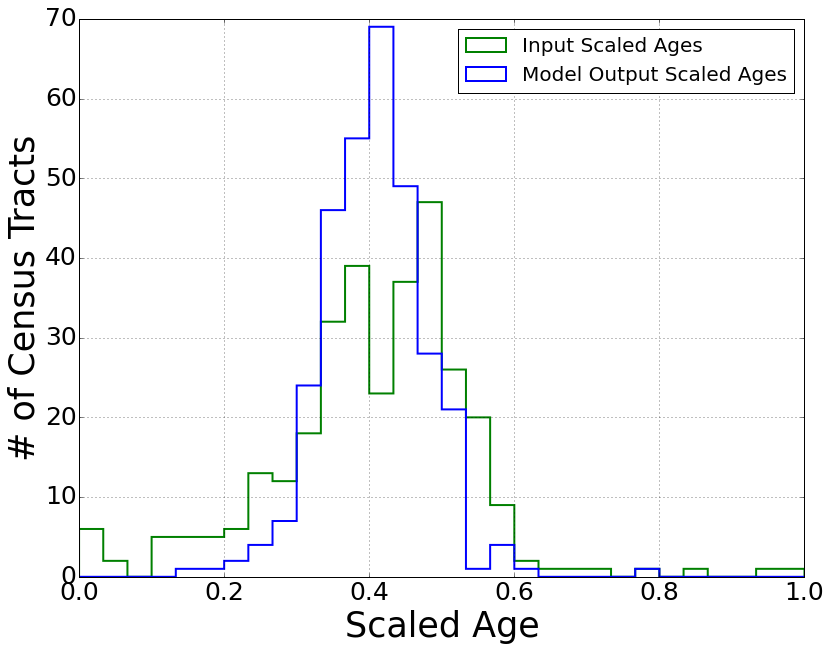

In [53]:
# save just scaled business ages out of dataframe
bus_age = features.bus_age.values

# use coefficients to calculate scaled ages for each census tract
bus_age_pred = model.predict(features)

# make histogram of scaled ages input and output
plt.figure(figsize=(13, 10))
plt.hist([bus_age_pred,bus_age], bins=30, histtype='step', align='mid', linewidth=2, \
         label=['Model Output Scaled Ages','Input Scaled Ages'])
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Scaled Age',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# print some stats about model output
print np.mean(bus_age_pred)
print np.median(bus_age_pred)
print np.std(bus_age_pred)

In [54]:
# read in min/max values for each feature
minmax = pd.read_csv('data_final/min_max_features.csv',index_col=0)
minmax

,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,n_businesses_42,...,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,total_amount
min_max,,,,,,,,,,,,,,,,,,,,,
max_vals,1.0,3281.0,4.0,1.0,8.0,185.0,34.0,40.0,148.0,264.0,...,100.0,100.0,100.0,172846.0,230179.0,188750.0,3688.0,4000.0,2000.0,191205635.0
min_vals,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# define list of simple NAICS business codes
codes = [11,21,22,23,31,32,33,42,44,45,48,49,51,52,53,54,55,56,61,62,71,72,81,92]

# initialize lists of tracts, codes, and final predicted ages
tracts_final = np.ndarray(0)
codes_final = np.ndarray(0)
bus_age_pred_final = np.ndarray(0)

# go through each code
for code in codes:
    # reset new features dataframe
    new_features = features.copy()
    
    # save min/max of total business count
    temp_min = minmax.loc['min_vals']['n_business']
    temp_max = minmax.loc['max_vals']['n_business']
    # unscale total business count
    temp_n_bus = new_features['n_business'] * (temp_max-temp_min) + temp_min
    # increment total business count
    temp_n_bus += 1
    # rescale and save new total business count
    new_features['n_business'] = (temp_n_bus-temp_min) / (temp_max-temp_min)
    
    # save min/max of current code business count
    temp_min = minmax.loc['min_vals']['n_businesses_'+str(code)]
    temp_max = minmax.loc['max_vals']['n_businesses_'+str(code)]
    # unscale total business count
    temp_n_bus = new_features['n_businesses_'+str(code)] * (temp_max-temp_min) + temp_min
    # increment total business count
    temp_n_bus += 1
    # rescale and save new total business count
    new_features['n_businesses_'+str(code)] = (temp_n_bus-temp_min) / (temp_max-temp_min)

    # make predictions for this code for all tracts
    bus_age_pred = model.predict(new_features)
    
    # update lists of tracts, codes, and final predicted ages
    tracts_final = np.concatenate((tracts_final,new_features.census_tract.values))
    codes_final = np.concatenate((codes_final,[code]*len(bus_age_pred)))
    bus_age_pred_final = np.concatenate((bus_age_pred_final,bus_age_pred))

In [127]:
# check stuff that will be saved
print tracts_final.shape
#tracts_final[:400]
print codes_final.shape
#codes_final[:400]
print bus_age_pred_final.shape
#bus_age_pred_final[:400]

(7536,)
(7536,)
(7536,)


0.406209552142
0.406217575073
0.0710690390769


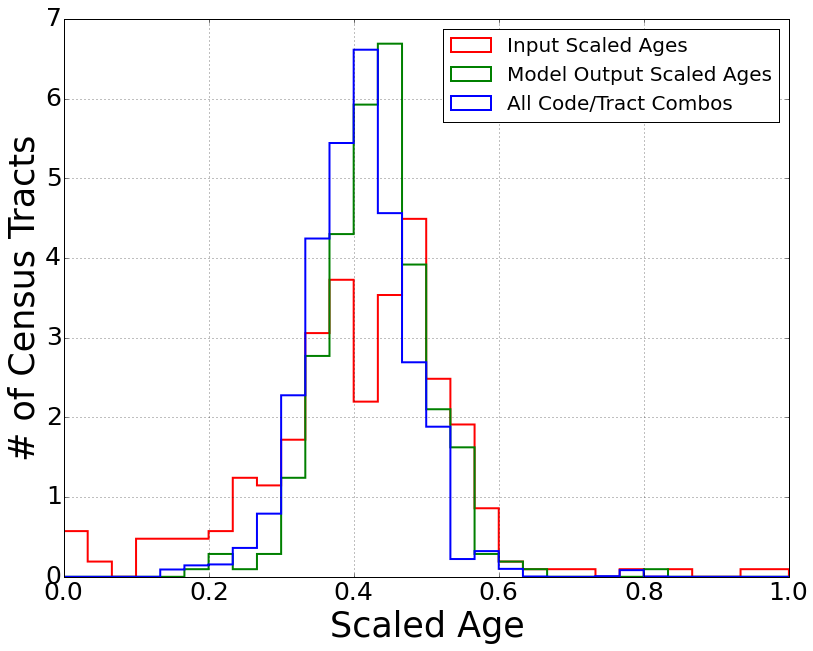

In [128]:
# make histogram of scaled ages input and output and final output (for each business/tract combo)
plt.figure(figsize=(13, 10))
plt.hist([bus_age_pred_final,bus_age_pred,bus_age], bins=30, histtype='step', align='mid', linewidth=2, normed=1, \
         label=['All Code/Tract Combos','Model Output Scaled Ages','Input Scaled Ages'])
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Scaled Age',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# print some stats about model output
print np.mean(bus_age_pred_final)
print np.median(bus_age_pred_final)
print np.std(bus_age_pred_final)

39.5753917971
39.5766215086
10.8930778872


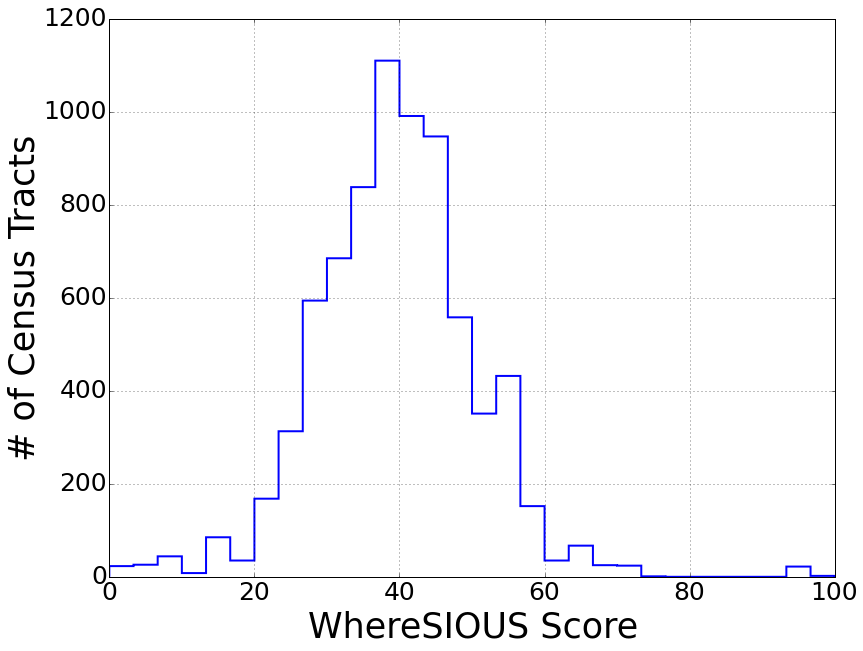

In [129]:
# scale ages to be WhereSIOUS scores between 0 and 100
scores = (bus_age_pred_final-min(bus_age_pred_final)) / (max(bus_age_pred_final)-min(bus_age_pred_final)) * 100

# make histogram WhereSIOUS scores
plt.figure(figsize=(13, 10))
plt.hist(scores, bins=30, histtype='step', align='mid', linewidth=2)
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('WhereSIOUS Score',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# print some stats about model output
print np.mean(scores)
print np.median(scores)
print np.std(scores)

In [130]:
# save lists of tracts, codes, and final predicted ages as a dataframe
df_out = pd.DataFrame({'census_tract': tracts_final, 'code_simple': codes_final, \
                       'predicted_bus_age': bus_age_pred_final})
print df_out.shape
print df_out[:520]

# save lists of tracts, codes, and final predicted ages as a dataframe
df_out_score = pd.DataFrame({'census_tract': tracts_final, 'code_simple': codes_final, 'score': scores})
print df_out_score.shape
df_out_score[:520]

(7536, 3)
     census_tract  code_simple  predicted_bus_age
0           100.0         11.0           0.459103
1           201.0         11.0           0.432898
2           202.0         11.0           0.438179
3           300.0         11.0           0.508205
4           400.0         11.0           0.422279
5           500.0         11.0           0.467710
6           600.0         11.0           0.440971
7           700.0         11.0           0.385826
8           800.0         11.0           0.409096
9           900.0         11.0           0.373993
10         1000.0         11.0           0.463205
11         1100.0         11.0           0.507368
12         1200.0         11.0           0.386467
13         1300.0         11.0           0.342739
14         1400.0         11.0           0.372753
15         1500.0         11.0           0.402451
16         1600.0         11.0           0.341858
17         1700.0         11.0           0.403603
18         1800.0         11.0          

,census_tract,code_simple,score
0,100.0,11.0,47.682557
1,201.0,11.0,43.665986
2,202.0,11.0,44.475498
3,300.0,11.0,55.208766
4,400.0,11.0,42.038485
5,500.0,11.0,49.001924
6,600.0,11.0,44.903496
7,700.0,11.0,36.451128
8,800.0,11.0,40.017775
9,900.0,11.0,34.637401


In [131]:
# make new dataframe for heat map plotting
df_map = df_out.pivot(index='census_tract', columns='code_simple', values='predicted_bus_age')
print df_map.shape
df_map

(314, 24)


code_simple,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,...,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
census_tract,,,,,,,,,,,,,,,,,,,,,
100.0,0.459103,0.454998,0.454998,0.466175,0.459057,0.459236,0.464703,0.464090,0.465054,0.464569,...,0.464245,0.465607,0.472576,0.464979,0.463024,0.465305,0.464397,0.462288,0.465801,0.490372
201.0,0.432898,0.428793,0.428793,0.439970,0.432852,0.433031,0.438498,0.437885,0.438833,0.438364,...,0.438040,0.439404,0.446356,0.438774,0.436819,0.439100,0.438208,0.436083,0.439611,0.464167
202.0,0.438179,0.434074,0.434074,0.445251,0.438133,0.438313,0.443779,0.443167,0.444115,0.443645,...,0.443321,0.444683,0.451637,0.444056,0.442101,0.444382,0.443474,0.441364,0.444893,0.469448
300.0,0.508205,0.504101,0.504101,0.515274,0.508160,0.508339,0.513805,0.513191,0.514141,0.513668,...,0.513348,0.514709,0.521679,0.514080,0.512127,0.514408,0.513500,0.511387,0.514919,0.539474
400.0,0.422279,0.418175,0.418175,0.429348,0.422218,0.422413,0.427879,0.427265,0.428215,0.427742,...,0.427422,0.428783,0.435738,0.428154,0.426201,0.428482,0.427574,0.425461,0.428978,0.453548
500.0,0.467710,0.463606,0.463606,0.474781,0.467665,0.467844,0.473310,0.472696,0.473646,0.473175,...,0.472853,0.474215,0.481169,0.473585,0.471632,0.473913,0.473021,0.470894,0.474424,0.498980
600.0,0.440971,0.436867,0.436867,0.448044,0.440910,0.441105,0.446571,0.445961,0.446907,0.446438,...,0.446114,0.447475,0.454430,0.446850,0.444893,0.447174,0.446266,0.444157,0.447685,0.472240
700.0,0.385826,0.381721,0.381721,0.392895,0.385780,0.385960,0.391426,0.390812,0.391762,0.391293,...,0.390984,0.392330,0.399284,0.391701,0.389748,0.392029,0.391121,0.389011,0.392525,0.417095
800.0,0.409096,0.404991,0.404991,0.416164,0.409050,0.409229,0.414696,0.414082,0.415031,0.414558,...,0.414253,0.415600,0.422554,0.414970,0.413017,0.415298,0.414406,0.412281,0.415810,0.440365


In [132]:
# propagate business ages for each tract through each business type
age_code_og = np.vstack([features.bus_age.values]*24).T

In [134]:
# get change in business age after adding a new business
diff_ages = df_map.values - age_code_og
print df_map.values[:3]
print age_code_og[:3]
diff_ages

[[ 0.45910263  0.45499802  0.45499802  0.46617508  0.45905685  0.45923615
   0.46470261  0.46409035  0.46505356  0.46456909  0.46538925  0.46470642
   0.46116257  0.46174049  0.46424484  0.46560669  0.47257614  0.46497917
   0.46302414  0.46530533  0.46439743  0.4622879   0.46580124  0.4903717 ]
 [ 0.43289757  0.42879295  0.42879295  0.43997002  0.43285179  0.43303108
   0.43849754  0.43788528  0.43883324  0.43836403  0.43918419  0.43850136
   0.4349575   0.43553543  0.43803978  0.43940353  0.44635582  0.43877411
   0.43681908  0.43910027  0.43820763  0.43608284  0.43961143  0.46416664]
 [ 0.43817902  0.4340744   0.4340744   0.44525146  0.43813324  0.43831253
   0.44377899  0.44316673  0.44411469  0.44364548  0.44446564  0.44378281
   0.44023895  0.44081688  0.44332123  0.44468307  0.45163727  0.44405556
   0.44210052  0.44438171  0.44347382  0.44136429  0.44489288  0.46944809]]
[[ 0.54187629  0.54187629  0.54187629  0.54187629  0.54187629  0.54187629
   0.54187629  0.54187629  0.54187

array([[-0.08277366, -0.08687828, -0.08687828, ..., -0.07958839,
        -0.07607506, -0.05150459],
       [-0.10535339, -0.10945801, -0.10945801, ..., -0.10216812,
        -0.09863953, -0.07408432],
       [-0.10369728, -0.10780189, -0.10780189, ..., -0.10051201,
        -0.09698341, -0.07242821],
       ..., 
       [ 0.0140861 ,  0.00998149,  0.00998149, ...,  0.01727137,
         0.02079997,  0.04535517],
       [ 0.01625162,  0.012147  ,  0.012147  , ...,  0.01943689,
         0.02296549,  0.04752069],
       [ 0.18264129,  0.17853667,  0.17853667, ...,  0.18582656,
         0.18935516,  0.21391036]])

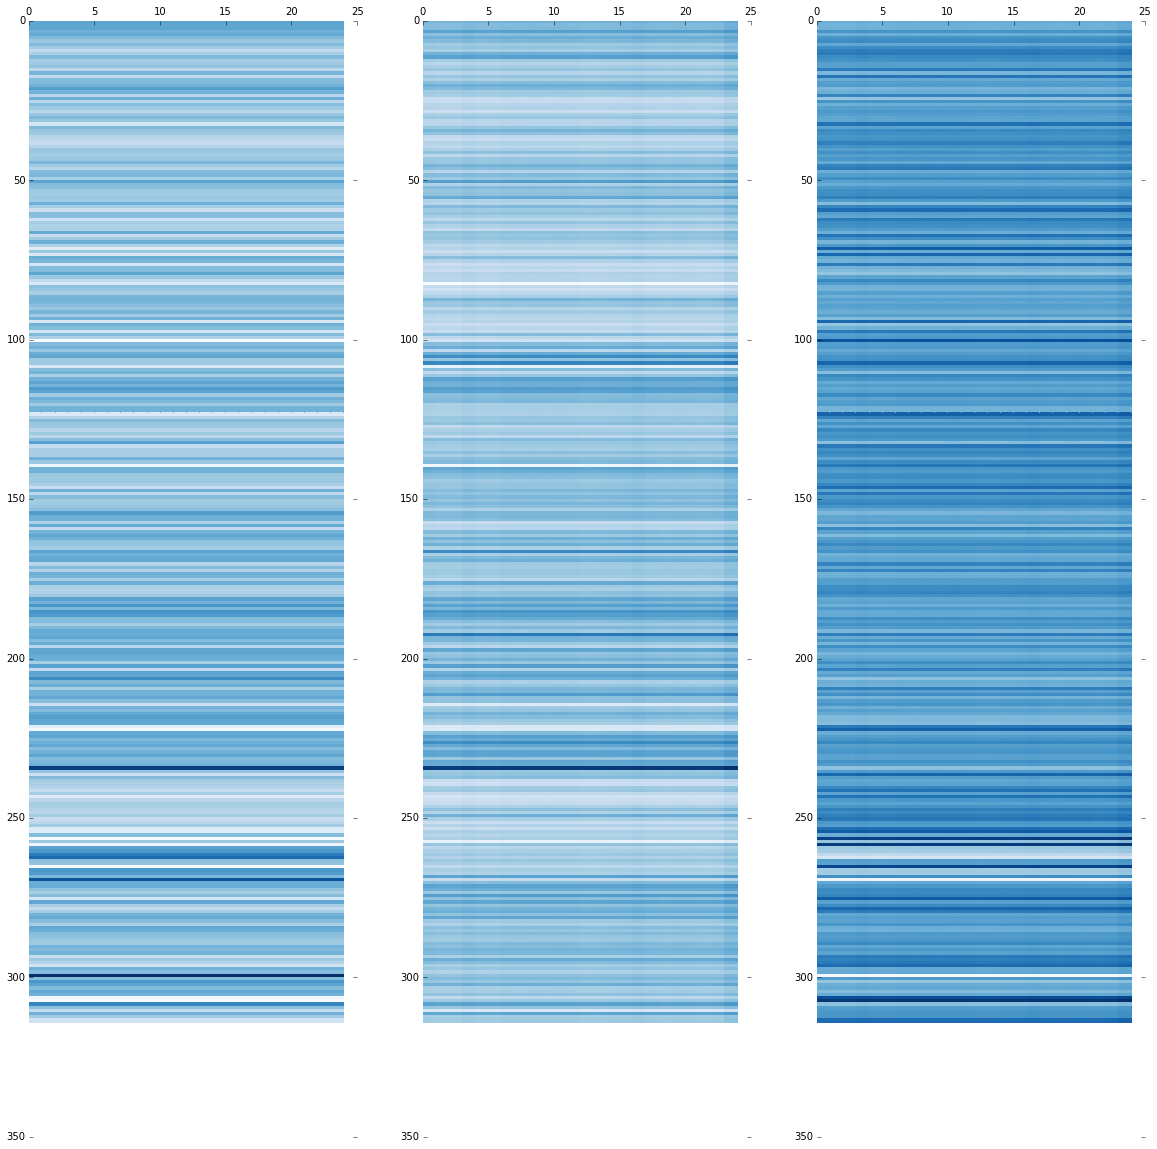

In [137]:
# make figure for heat map
fig, ax = plt.subplots(1,3)

# heat map of original business ages
heatmap = ax[0].pcolor(age_code_og,cmap=plt.cm.Blues)
# fix presentation
fig = plt.gcf()
fig.set_size_inches(20, 20)
# turn off the frame
ax[0].set_frame_on(False)
# want a more natural, table-like display
ax[0].invert_yaxis()
ax[0].xaxis.tick_top()
ax[0].grid(False)

# heat map of model output business ages for every tract/code combo
heatmap = ax[1].pcolor(df_map.values,cmap=plt.cm.Blues)
# turn off the frame
ax[1].set_frame_on(False)
# want a more natural, table-like display
ax[1].invert_yaxis()
ax[1].xaxis.tick_top()
ax[1].grid(False)

# heat map of model output business ages for every tract/code combo
heatmap = ax[2].pcolor(diff_ages,cmap=plt.cm.Blues)
# turn off the frame
ax[2].set_frame_on(False)
# want a more natural, table-like display
ax[2].invert_yaxis()
ax[2].xaxis.tick_top()
ax[2].grid(False)

plt.show()

58.8468586457
58.1643420993
11.5464910005


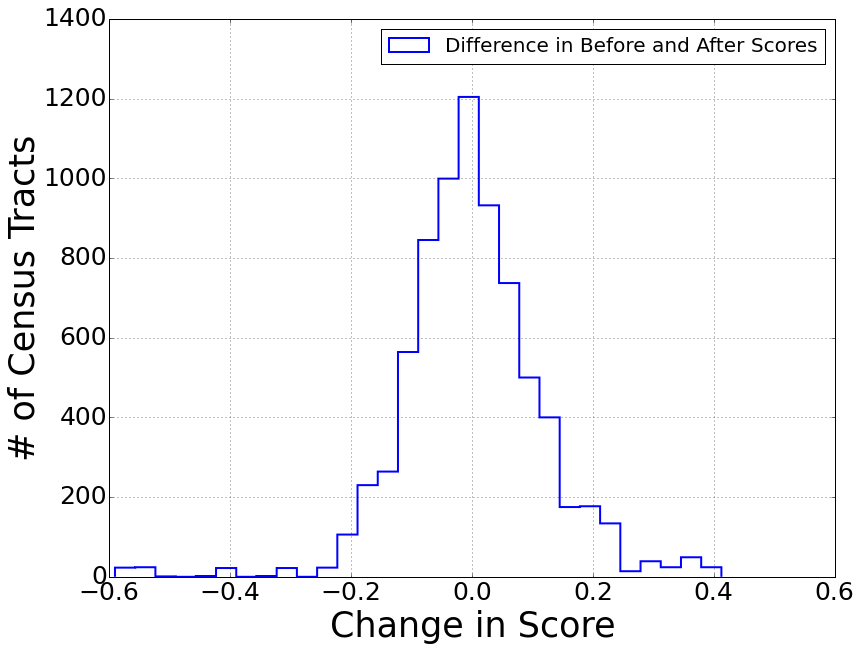

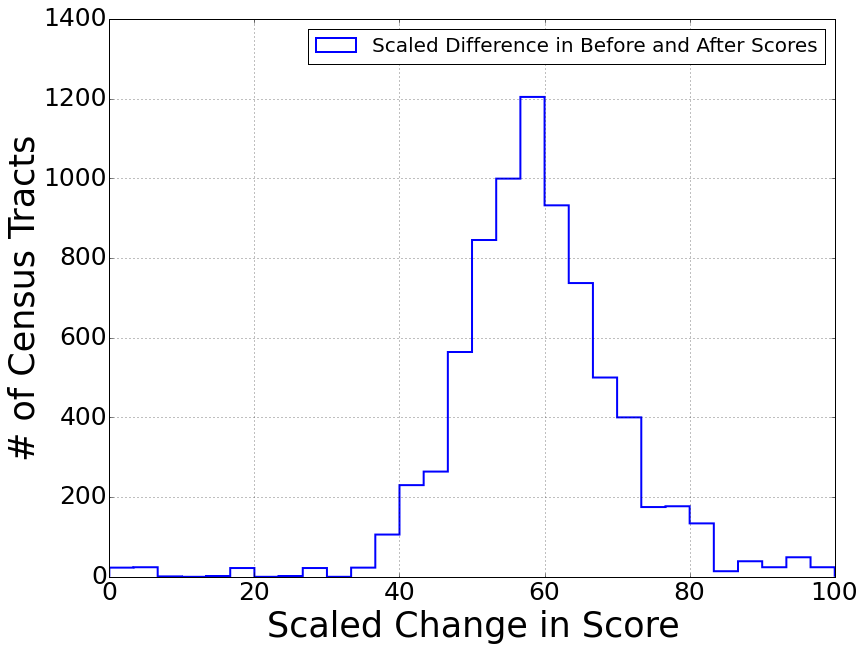

In [149]:
# flatten diffs for histogram purposes
diff_ages = diff_ages.flatten()

# make histogram of diffs
plt.figure(figsize=(13, 10))
plt.hist(diff_ages, bins=30, histtype='step', align='mid', linewidth=2, \
         label=['Difference in Before and After Scores'])
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Change in Score',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# scale diffs to 0 to 100
diff_ages_scaled = (diff_ages-min(diff_ages)) / (max(diff_ages)-min(diff_ages)) * 100

# make histogram of diffs scaled 0 to 100
plt.figure(figsize=(13, 10))
plt.hist(diff_ages_scaled, bins=30, histtype='step', align='mid', linewidth=2, \
         label=['Scaled Difference in Before and After Scores'])
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Scaled Change in Score',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# print some stats about model output
print np.mean(diff_ages_scaled)
print np.median(diff_ages_scaled)
print np.std(diff_ages_scaled)

In [14]:
# write dataframe of tracts, codes, and scores to csv in data_final folder and in flask static folder
df_out_score.to_csv('data_final/tracts_codes_scores.csv')
df_out_score.to_csv('wheresious/static/tracts_codes_scores.csv')

In [15]:
# test reading in dataframe of tracts, codes, and scores
temp = pd.read_csv('data_final/tracts_codes_scores.csv',index_col=0)
print temp.shape
temp[:10]

# test looking up a score given a tract and code
tract = 9104
code = 21
# get correct row of dataframe
score_row = temp[(temp.census_tract==tract) & (temp.code_simple==code)].score
# get score itself
score = score_row.values[0]
# format score to one decimal place
result = '{:.1f}'.format(score)
print result

(7536, 3)
53.7
